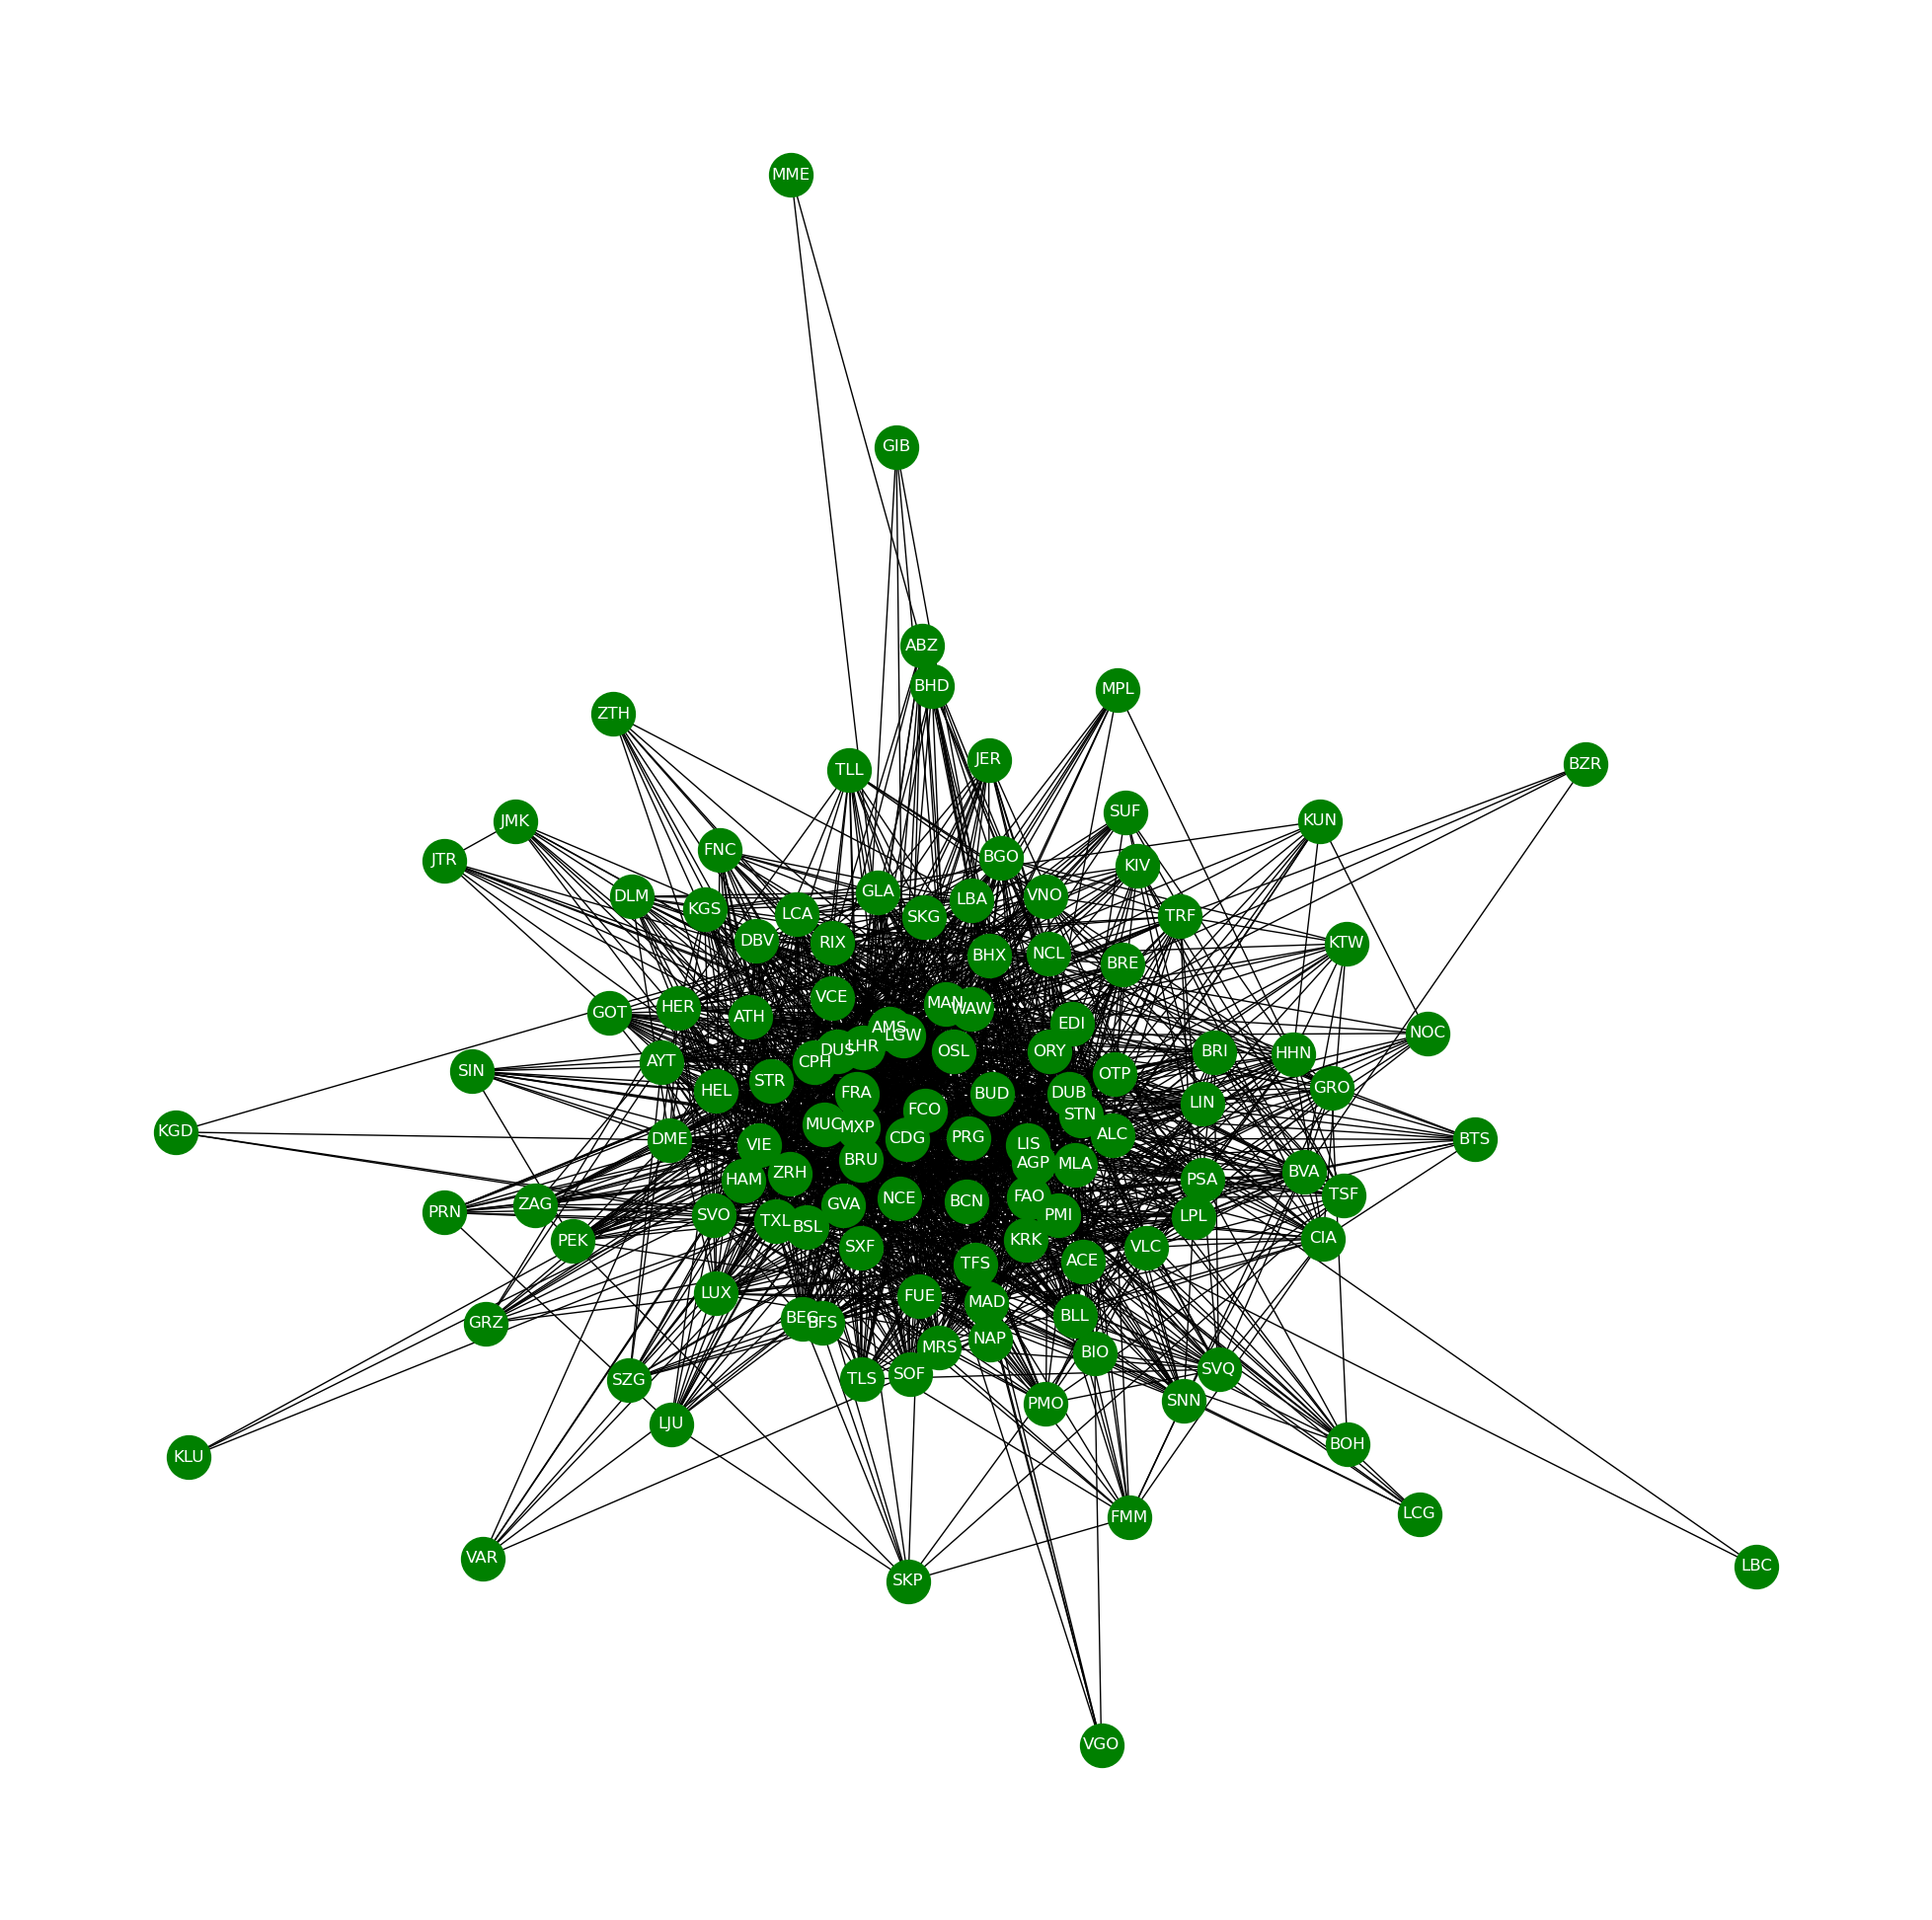

In [12]:
import networkx as nx
%matplotlib inline
import random
import matplotlib.pyplot as plt

# Carica il grafo dal file "openflights_world.graphml.gz"
graph = nx.read_graphml("openflights_world.graphml.gz")

# Seleziona solo gli aeroporti italiani
european_airports = [node for node in graph.nodes() if graph.nodes[node]["IATA"] in ['GRZ', 'IEG', 'PEK', 'BFS', 'LBA', 'KIV', 'GLA', 'LPL', 'DUB', 'BOH', 
                                                                                     'LIS', 'MLA', 'DUS', 'GVA', 'PMO', 'ABZ', 'LGW', 'ORY', 'VAR', 'NAP', 
                                                                                     'HHN', 'MAD', 'SXF', 'LJU', 'STN', 'PSA', 'BGO', 'GOT', 'NCE', 'BEG', 
                                                                                     'TXL', 'BVA', 'BUD', 'VCE', 'FCO', 'KTW', 'SOF', 'SVO', 'LHR', 'FRA', 
                                                                                     'BHX', 'AMS', 'OSL', 'MRS', 'RIX', 'WAW', 'CIA', 'BRU', 'BSL', 'LCA', 
                                                                                     'VNO', 'TFS', 'VIE', 'MUC', 'PMI', 'TLL', 'FUE', 'TFS', 'CDG', 'HER', 
                                                                                     'MXP', 'PRG', 'SKG', 'DBV', 'CPH', 'HAM', 'STN', 'HEL', 'ZRH', 'ALC', 
                                                                                     'AYT', 'GIB', 'HER', 'KGS', 'JER', 'BIO', 'LPL', 'EDI', 'LUX', 'FNC', 
                                                                                     'HER', 'BRI', 'BLL', 'SZG', 'ATH', 'JTR', 'TRF', 'MAN', 'SIN', 'SKP', 
                                                                                     'DME', 'OTP', 'MME', 'BCN', 'FAO', 'MLA', 'LBC', 'SZG', 'FMM', 'KLU', 
                                                                                     'BEG', 'DBV', 'VGO', 'BHD', 'VLC', 'MPL', 'BRE', 'BTS', 'HER', 'PRN', 
                                                                                     'GIB', 'LCA', 'KUN', 'LBA', 'NOC', 'DLM', 'STN', 'AGP', 'FAO', 'NCL', 
                                                                                     'LPL', 'GLA', 'PRG', 'KRK', 'OTP', 'BFS', 'TFS', 'ZTH', 'BZR', 'FNC', 
                                                                                     'KGD', 'TLS', 'MUC', 'SKP', 'TLS', 'GIB', 'LIS', 'AMS', 'SOF', 'LCG', 
                                                                                     'PRG', 'GRO', 'PRG', 'BSL', 'LHR', 'FNC', 'SUF', 'LCA', 'LIN', 'SNN', 
                                                                                     'MUC', 'VLC', 'NCE', 'LCA', 'GVA', 'LUX', 'LGW', 'FNC', 'TSF', 'LBA', 
                                                                                     'ZAG', 'STR', 'PMO', 'BEG', 'BIO', 'VLC', 'TFS', 'MRS', 'LIS', 'BFS', 
                                                                                     'JMK', 'VIE', 'SVQ', 'LIS', 'HAM', 'JER', 'EDI', 'PRG', 'PMO', 'FRA', 
                                                                                     'DUB', 'LUX', 'TFS', 'ACE', 'PRG']]

# Crea un nuovo grafo contenente solo gli aeroporti italiani
european_graph = graph.subgraph(european_airports).copy()
fig, ax = plt.subplots(figsize=(25, 25))
nx.draw(european_graph, node_size=1000 , with_labels=True, node_color="green", font_color="white")
plt.show()

In [14]:
G = european_graph

In [15]:
my_edge_betweenness=nx.edge_betweenness_centrality(G)
max(my_edge_betweenness, key=my_edge_betweenness.get)

('AMS', 'MME')

In [ ]:
Graph_copy = G.copy()
partition_sequence = []
for _ in range(Graph_copy.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(Graph_copy)
    most_valuable_edge = max(Graph_copy.edges(), key=my_edge_betweenness.get)
    Graph_copy.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(Graph_copy))
    partition_sequence.append(my_partition)
    print("N edges: ", Graph_copy.number_of_edges())

In [ ]:
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)
best_partition

In [21]:
print(len(best_partition))

75


In [18]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

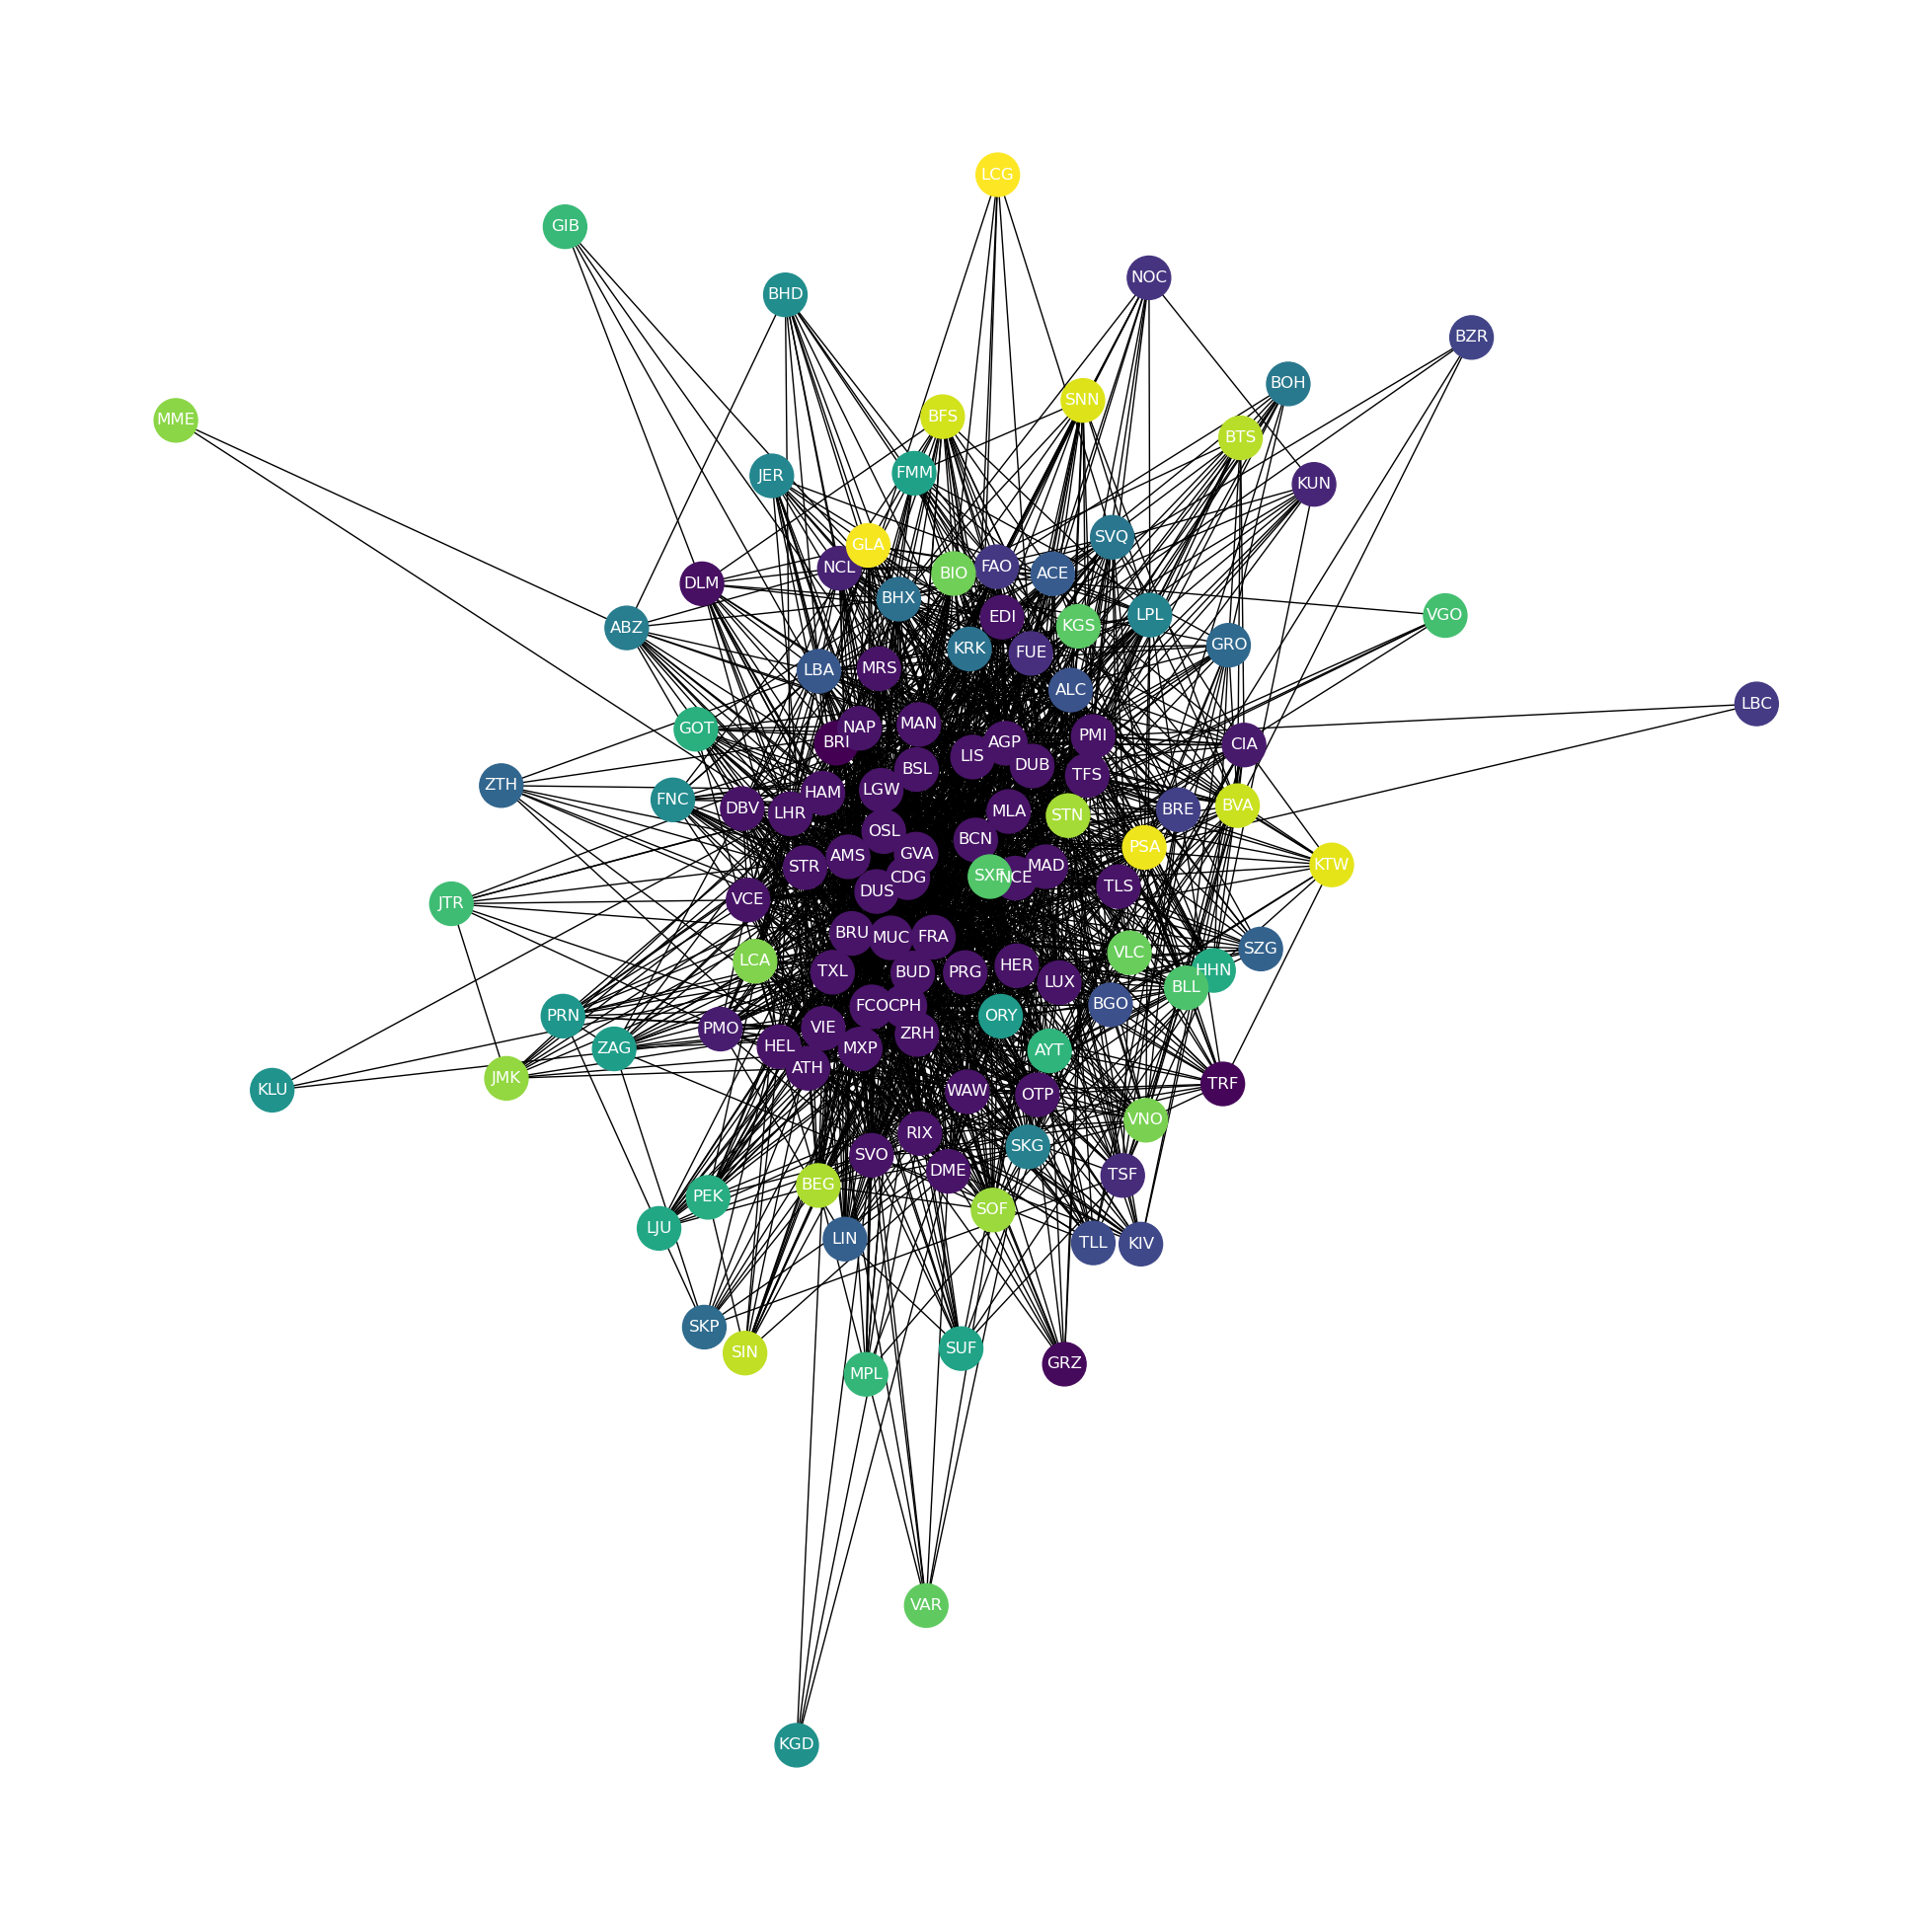

In [19]:
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
fig, ax = plt.subplots(figsize=(25, 25))
nx.draw(G, node_size=1000 , with_labels=True, node_color=node_colors, font_color="white")


In [20]:
nx.community.quality.modularity(G, best_partition)

0.004704060960234013

# Valuto la modularità dele singole partizioni

In [ ]:
modularity_sequence = [nx.community.quality.modularity(G, p) for p in partition_sequence]
modularity_sequence

Text(0.5, 0, 'Algorithm step')

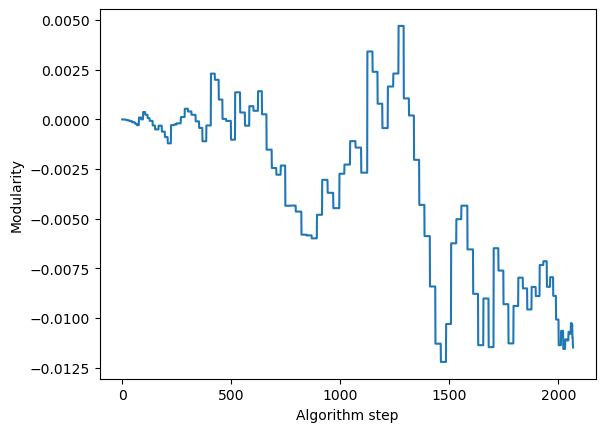

In [23]:
import matplotlib.pyplot as plt
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')